In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
import matplotlib 
font = {'size'   : 22}

matplotlib.rc('font', **font)

In [3]:
df = pd.read_csv('results.csv')
df.head()

,Unnamed: 0,matmul_numpy,c_cuda_matmul,matmul_one_thread_python,cpu_cython_matmul,c_cpu_matmul,cpu_cython_parallel_matmul
0,0,0.000005,0.000771,0.000696,0.000004,0.000010,0.000433
1,1,0.000003,0.000528,0.004545,0.000011,0.000052,0.000429
2,2,0.000006,0.000673,0.034732,0.000068,0.000385,0.000416
3,3,0.000027,0.001036,0.280602,0.000503,0.003276,0.000474
4,4,0.000309,0.000992,2.240445,0.004260,0.024187,0.001200


In [4]:
df.multiply(1000).round(3).to_csv('rounded_results.csv')

In [5]:
df = pd.read_csv('rounded_results.csv')
df = df.replace(0, np.NaN)
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
columns = df.columns
df.head()

,matmul_numpy,c_cuda_matmul,matmul_one_thread_python,cpu_cython_matmul,c_cpu_matmul,cpu_cython_parallel_matmul
0,0.005,0.771,0.696,0.004,0.010,0.433
1,0.003,0.528,4.545,0.011,0.052,0.429
2,0.006,0.673,34.732,0.068,0.385,0.416
3,0.027,1.036,280.602,0.503,3.276,0.474
4,0.309,0.992,2240.445,4.260,24.187,1.200


In [6]:
name2beauty_name = {
    'matmul_numpy': 'CPU Python Numpy Dot',
    'c_cuda_matmul': 'GPU Cython CUDA matmul',
    'matmul_one_thread_python': 'CPU Python loops',
    'cpu_cython_matmul': 'CPU Cython matmul',
    'c_cpu_matmul': 'CPU C via Cython call',
    'cpu_cython_parallel_matmul': 'CPU Cython parallel (6 threads) OpenMP',
}

In [7]:
array_size = [2 ** i for i in range(3, 12)]

In [8]:
array_size

[8, 16, 32, 64, 128, 256, 512, 1024, 2048]

In [9]:
data = df.values
data

array([[5.0000000e-03, 7.7100000e-01, 6.9600000e-01, 4.0000000e-03,
        1.0000000e-02, 4.3300000e-01],
       [3.0000000e-03, 5.2800000e-01, 4.5450000e+00, 1.1000000e-02,
        5.2000000e-02, 4.2900000e-01],
       [6.0000000e-03, 6.7300000e-01, 3.4732000e+01, 6.8000000e-02,
        3.8500000e-01, 4.1600000e-01],
       [2.7000000e-02, 1.0360000e+00, 2.8060200e+02, 5.0300000e-01,
        3.2760000e+00, 4.7400000e-01],
       [3.0900000e-01, 9.9200000e-01, 2.2404450e+03, 4.2600000e+00,
        2.4187000e+01, 1.2000000e+00],
       [1.4250000e+00, 1.4450000e+00, 1.9180403e+04, 3.7983000e+01,
        2.0296900e+02, 9.9030000e+00],
       [3.4840000e+00, 2.0620000e+00,           nan, 4.7252400e+02,
        1.7018890e+03, 1.4302000e+02],
       [2.2198000e+01, 5.2680000e+00,           nan,           nan,
                  nan,           nan],
       [1.1185400e+02, 1.9616000e+01,           nan,           nan,
                  nan,           nan]])

In [10]:
data[::, 1]

array([ 0.771,  0.528,  0.673,  1.036,  0.992,  1.445,  2.062,  5.268,
       19.616])

In [11]:
def draw_plot(iterator, title):
    fig = plt.figure(figsize=(12, 12))
    for i in iterator:
        plt.plot(data[::, i], '-o', label=name2beauty_name[columns[i]])
    plt.title(title)
    plt.xlabel("Matrix shape")
    plt.ylabel("Time (ms.)")
    plt.xticks(np.arange(0, len(array_size)), array_size)

    plt.grid()
    plt.legend()
    
    fig.savefig(os.path.join('images', title.replace(' ', '') + '.svg'))

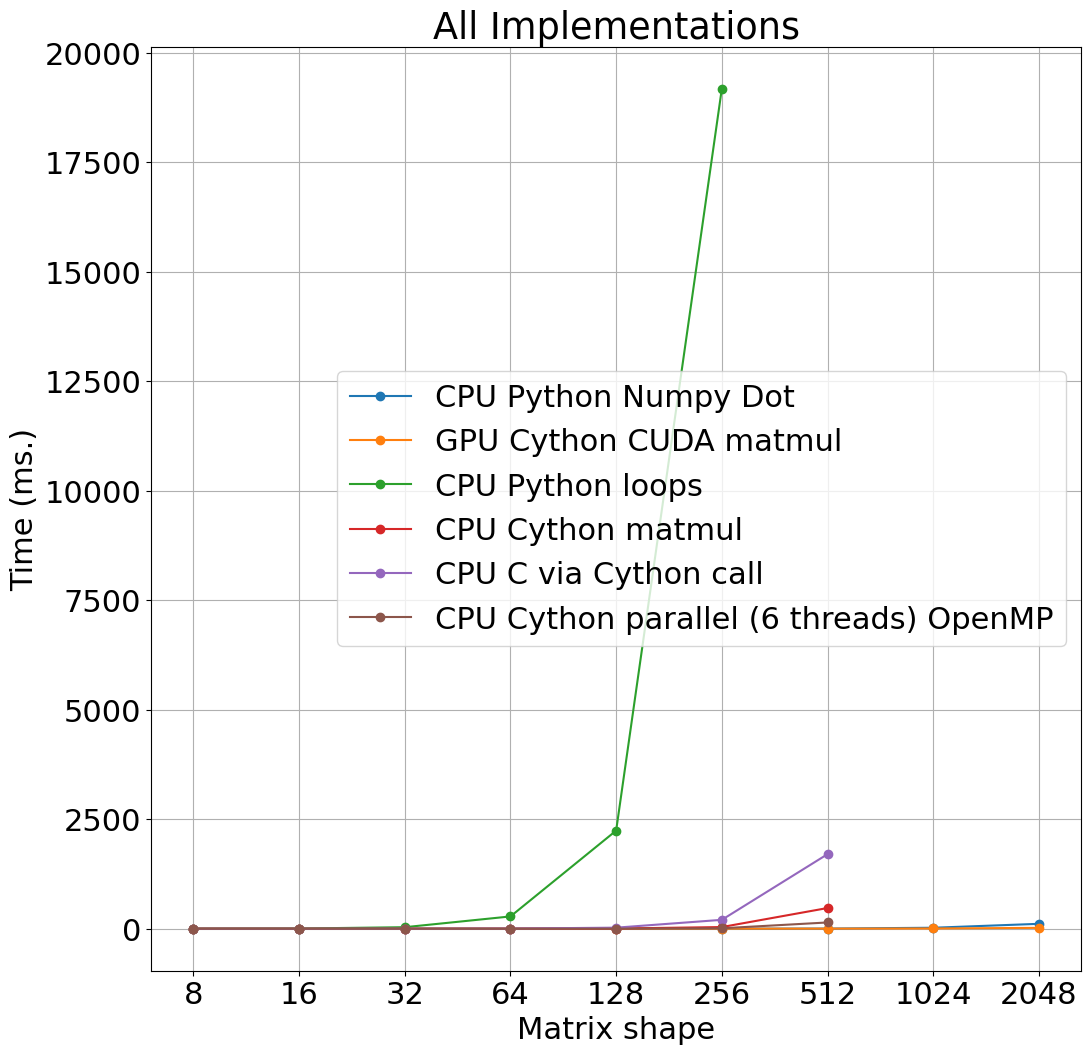

In [12]:
draw_plot(range(data.shape[1]), "All Implementations")

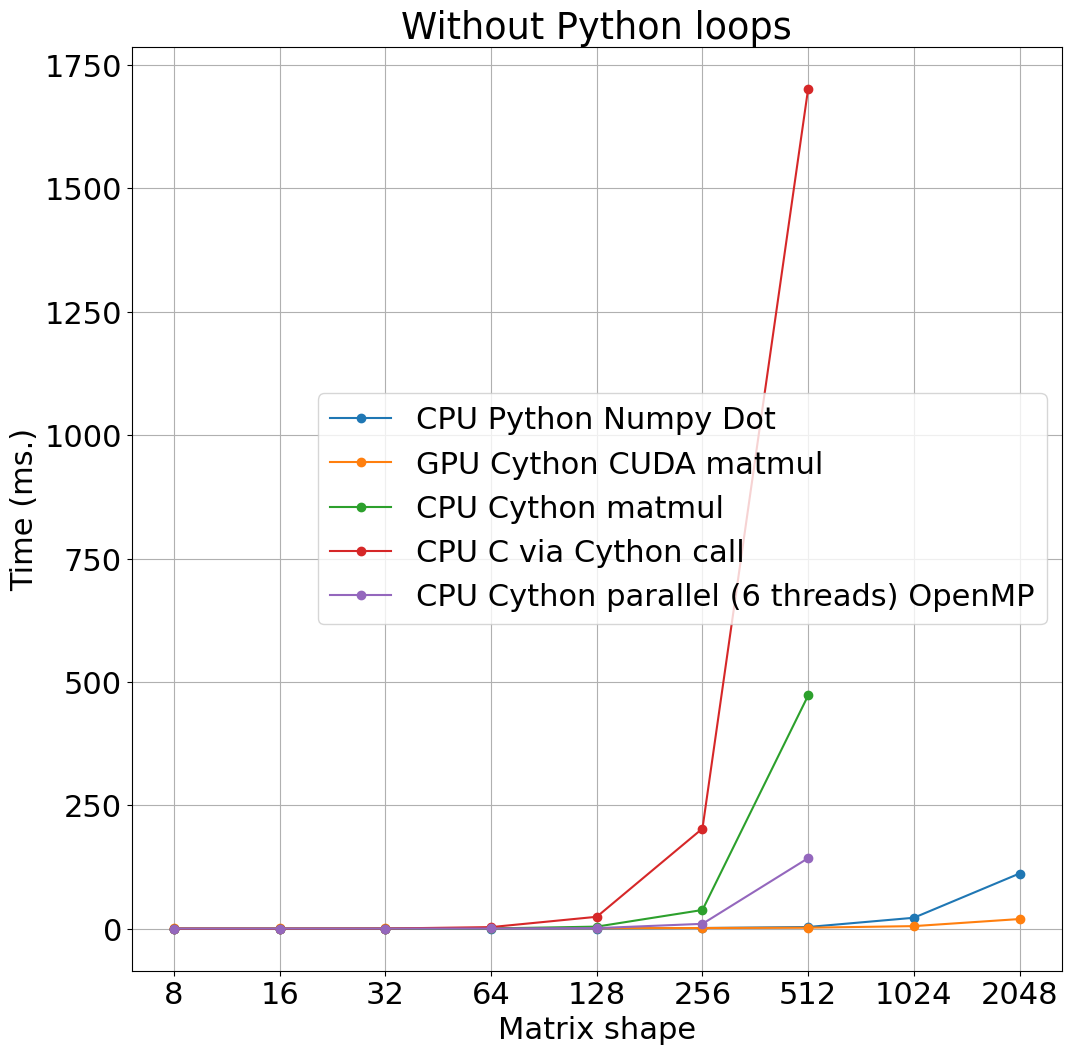

In [13]:
draw_plot([0, 1, 3, 4, 5], "Without Python loops")

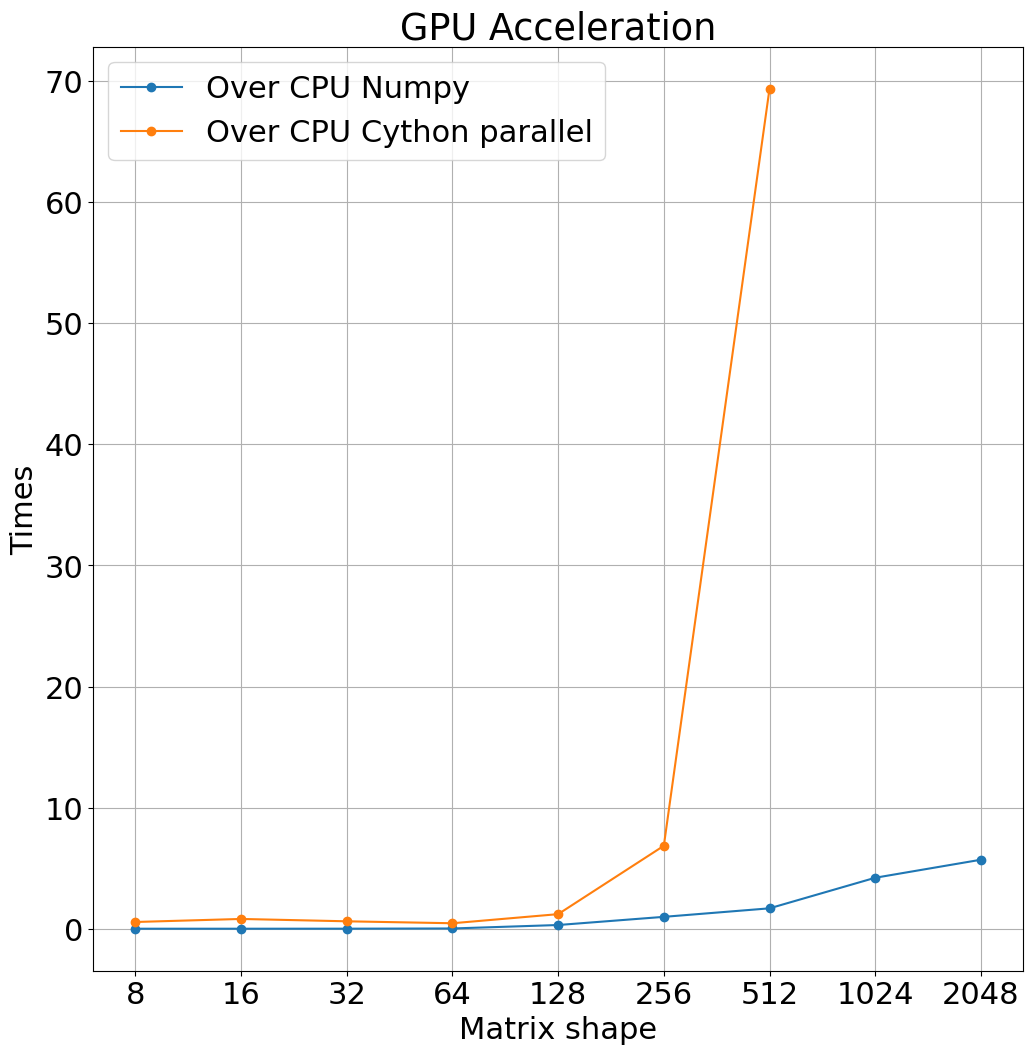

In [14]:
title = "GPU Acceleration"
fig = plt.figure(figsize=(12, 12))

plt.plot(np.arange(0, len(array_size)), data[::, 0] / data[::, 1], '-o')
plt.plot(np.arange(0, len(array_size)), data[::, 5] / data[::, 1], '-o')
    
plt.title(title)
plt.xlabel("Matrix shape")
plt.ylabel("Times")
plt.xticks(np.arange(0, len(array_size)), array_size)
plt.grid()

plt.legend(['Over CPU Numpy', 'Over CPU Cython parallel'])

fig.savefig(os.path.join('images', title.replace(' ', '') + '.svg'))